<a href="https://colab.research.google.com/github/LennartReddm/ReplicatorDynamicsMultipleGames/blob/main/Replicator_Dynamics_for_Multiple_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hawk-Dove Game

In [6]:
# Create the pay-off matrix and calculate Nash equilibria for the classical Hawk-Dove game (also known as "Chicken").
# https://en.wikipedia.org/wiki/Chicken_(game)

b = 2
c = 3

HawkDove = [[[ (b-c)/2, (b-c)/2], [ b,     0]],
            [[ 0, b]            , [ b/2, b/2]]]

print(gt.NormalFormGame(HawkDove))
print(gt.vertex_enumeration(gt.NormalFormGame(HawkDove)))

2-player NormalFormGame with payoff profile array:
[[[-0.5, -0.5],  [ 2. ,  0. ]],
 [[ 0. ,  2. ],  [ 1. ,  1. ]]]
[(array([1., 0.]), array([0., 1.])), (array([0., 1.]), array([1., 0.])), (array([0.66666667, 0.33333333]), array([0.66666667, 0.33333333]))]


#### Classical evolutionary model - one population

In [7]:
# Building the replicator system for the Hawk-Dove contest assuming a single population. 
replicatorsystem_row, replicatorsystem_col = game_to_one_population_replicator_system(HawkDove)

print(replicatorsystem_row, replicatorsystem_col)

The average pay-off of Row playing strategy 0 is -0.5*p0 + 2.0*p1
The average pay-off of Row playing strategy 1 is 1.0*p1
The average pay-off of Row for the current strategy mix is p0*(-0.5*p0 + 2.0*p1) + 1.0*p1**2
The replicator system for Row strategy 0 is p0*(-p0*(-0.5*p0 + 2.0*p1) - 0.5*p0 - 1.0*p1**2 + 2.0*p1)
The replicator system for Row strategy 1 is p1*(-p0*(-0.5*p0 + 2.0*p1) - 1.0*p1**2 + 1.0*p1)
p0 1 - p1
The simplified replicator system for Row strategy 0 is p1*(-1.5*p1**2 + 2.0*p1 - 0.5)
p0 1 - p1
The simplified replicator system for Row strategy 1 is p1*(1.5*p1**2 - 2.0*p1 + 0.5)
[p1*(-1.5*p1**2 + 2.0*p1 - 0.5), p1*(1.5*p1**2 - 2.0*p1 + 0.5)] [p1*(-1.5*p1**2 + 2.0*p1 - 0.5), p1*(1.5*p1**2 - 2.0*p1 + 0.5)]


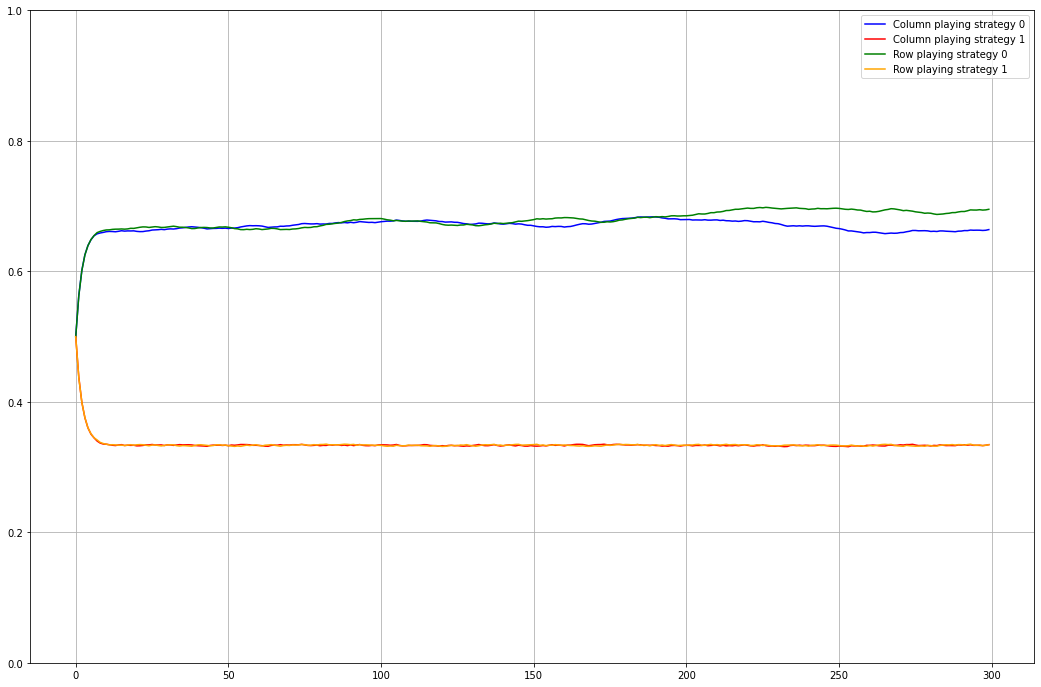

In [28]:
# Simulate and plot the population development for 300 iterations
popStateRow_lists, popStateCol_lists = replicator_simulation(replicatorsystem_row, replicatorsystem_col, 300, [0.5, 0.5], [0.5, 0.5])

plt.rcParams["figure.figsize"] = (18,12)

popStateRow_array = np.array(popStateRow_lists)
popStateCol_array = np.array(popStateCol_lists)

plt.plot(popStateCol_array[0, 1:], 'b', label ='Column playing strategy 0')
plt.plot(popStateCol_array[1, 1:], 'r', label ='Column playing strategy 1')

plt.plot(popStateRow_array[0, 1:], 'g', label ='Row playing strategy 0')
plt.plot(popStateRow_array[1, 1:], 'orange', label ='Row playing strategy 1')

plt.grid()
plt.ylim(0, 1)
plt.legend(loc='best')

### NOTE
# According to Wikipedia convergence to Nash is indeed the correct solution for one population:
# "In the one population model, the only stable state is the mixed strategy Nash equilibrium. Every initial population proportion (except all Hawk and all Dove) converge to the mixed 
# strategy Nash Equilibrium where part of the population plays Hawk and part of the population plays Dove. (This occurs because the only ESS is the mixed strategy equilibrium.)"
# https://en.wikipedia.org/wiki/Chicken_(game)#Replicator_dynamics

#### Classical evolutionary model - two populations

In [9]:
# Building the replicator system for the Hawk-Dove contest assuming two separate populations.
replicatorsystem_row, replicatorsystem_col = game_to_two_populations_replicator_system(HawkDove)

print(replicatorsystem_row, replicatorsystem_col)

The average pay-off of Row playing strategy 0 is -0.5*q0 + 2.0*q1
The average pay-off of Row playing strategy 1 is 1.0*q1
The average pay-off of Row for the current strategy mix is p0*(-0.5*q0 + 2.0*q1) + 1.0*p1*q1
The replicator system for Row strategy 0 is p0*(-p0*(-0.5*q0 + 2.0*q1) - 1.0*p1*q1 - 0.5*q0 + 2.0*q1)
The replicator system for Row strategy 1 is p1*(-p0*(-0.5*q0 + 2.0*q1) - 1.0*p1*q1 + 1.0*q1)
The simplified replicator system for Row strategy 0 is p1*(-1.5*p1*q1 + 0.5*p1 + 1.5*q1 - 0.5)
The simplified replicator system for Row strategy 1 is p1*(1.5*p1*q1 - 0.5*p1 - 1.5*q1 + 0.5)
The average pay-off of Column playing strategy 0 is -0.5*p0 + 2.0*p1
The average pay-off of Column playing strategy 1 is 1.0*p1
The average pay-off of Column for the current strategy mix is 1.0*p1*q1 + q0*(-0.5*p0 + 2.0*p1)
The replicator system for Column strategy 0 is q0*(-0.5*p0 - 1.0*p1*q1 + 2.0*p1 - q0*(-0.5*p0 + 2.0*p1))
The replicator system for Column strategy 1 is q1*(-1.0*p1*q1 + 1.0*p1 -

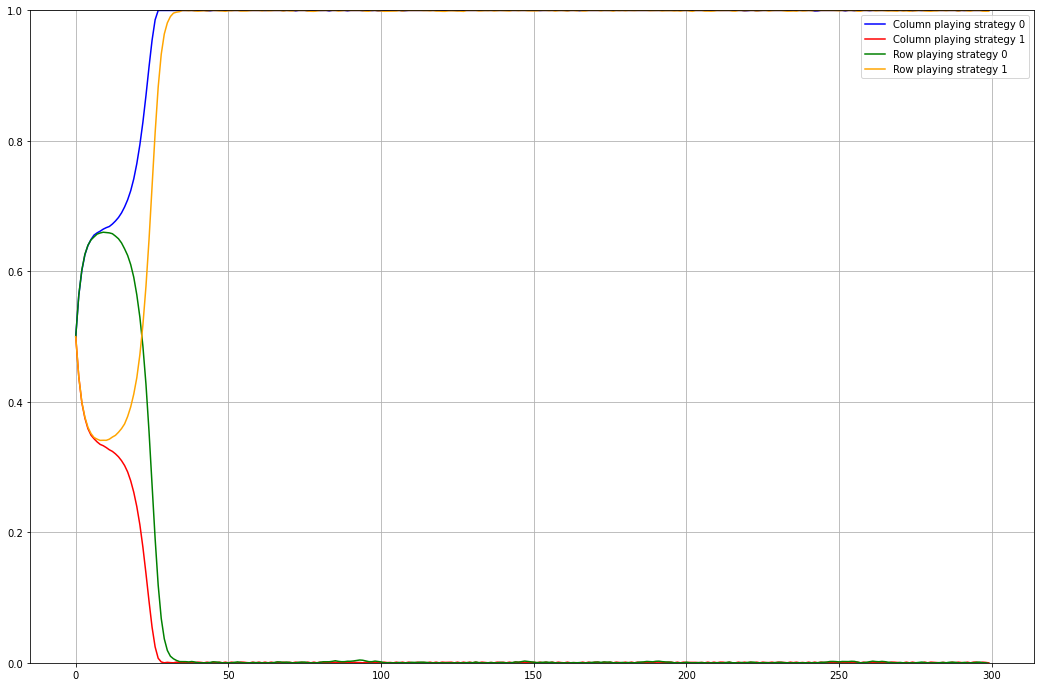

In [10]:
popStateRow_lists, popStateCol_lists = replicator_simulation(replicatorsystem_row, replicatorsystem_col, 300, [0.5, 0.5], [0.5, 0.5])

# print(popStateRow_lists[0])
#print(popStateRow_lists[1])
#print(popStateRow_lists[2])

plt.rcParams["figure.figsize"] = (18,12)

popStateRow_array = np.array(popStateRow_lists)
popStateCol_array = np.array(popStateCol_lists)

plt.plot(popStateCol_array[0, 1:], 'b', label ='Column playing strategy 0')
plt.plot(popStateCol_array[1, 1:], 'r', label ='Column playing strategy 1')

plt.plot(popStateRow_array[0, 1:], 'g', label ='Row playing strategy 0')
plt.plot(popStateRow_array[1, 1:], 'orange', label ='Row playing strategy 1')

plt.grid()
plt.ylim(0, 1)
plt.legend(loc='best')

### NOTE
# According to Wikipedia this is the correct solution for a two population Hawk-Dove game:
# "In the two population model, this mixed point becomes unstable. In fact, the only stable states in the two population model 
# correspond to the pure strategy equilibria, where one population is composed of all Hawks and the other of all Doves. 
# In this model one population becomes the aggressive population while the other becomes passive." [...]
# "The single population model presents a situation where no uncorrelated asymmetries exist, and so the best players 
# can do is randomize their strategies. The two population models provide such an asymmetry and the members of each 
# population will then use that to correlate their strategies. In the two population model, one population gains at 
# the expense of another. Hawk–Dove and Chicken thus illustrate an interesting case where the qualitative results for the 
# two different versions of the replicator dynamics differ wildly. [Weibull (1995) pp. 183–184]"
# https://en.wikipedia.org/wiki/Chicken_(game)#Replicator_dynamics

#### Finite population model

In [11]:
# Building the replicator system for the Hawk-Dove contest assuming one population of 10 contestants and a contest size of 2.
# This applies the anaysis frame work by Schaffer (1988) that generalises the classical Smith and Price (1973) ESS solution concept.
replicatorsystem_row, replicatorsystem_col =game_to_finite_population_replicator_system(HawkDove, 10, 2)

The average pay-off of Row playing strategy 0 is -0.5*p0 + 2.0*p1
The average pay-off of a random population member facing the mutant with strategy 0 is -0.5*p0
The average pay-off of Row playing strategy 1 is 1.0*p1
The average pay-off of a random population member facing the mutant with strategy 1 is 2.0*p0 + 1.0*p1
The exp. average pay-off of Row for the current strategy mix is p0*(-0.5*p0 + 2.0*p1) + 1.0*p1**2
0 0.8888888888888888 p0*(-0.5*p0 + 2.0*p1) + 1.0*p1**2 0.888888888888889*p0*(-0.5*p0 + 2.0*p1) + 0.888888888888889*p1**2
0 0.1111111111111111 -0.5*p0 -0.0555555555555556*p0
The replicator system for Row strategy 0 is p0*(-0.888888888888889*p0*(-0.5*p0 + 2.0*p1) - 0.444444444444444*p0 - 0.888888888888889*p1**2 + 2.0*p1)
1 0.8888888888888888 p0*(-0.5*p0 + 2.0*p1) + 1.0*p1**2 0.888888888888889*p0*(-0.5*p0 + 2.0*p1) + 0.888888888888889*p1**2
1 0.1111111111111111 2.0*p0 + 1.0*p1 0.222222222222222*p0 + 0.111111111111111*p1
The replicator system for Row strategy 1 is p1*(-0.88888888

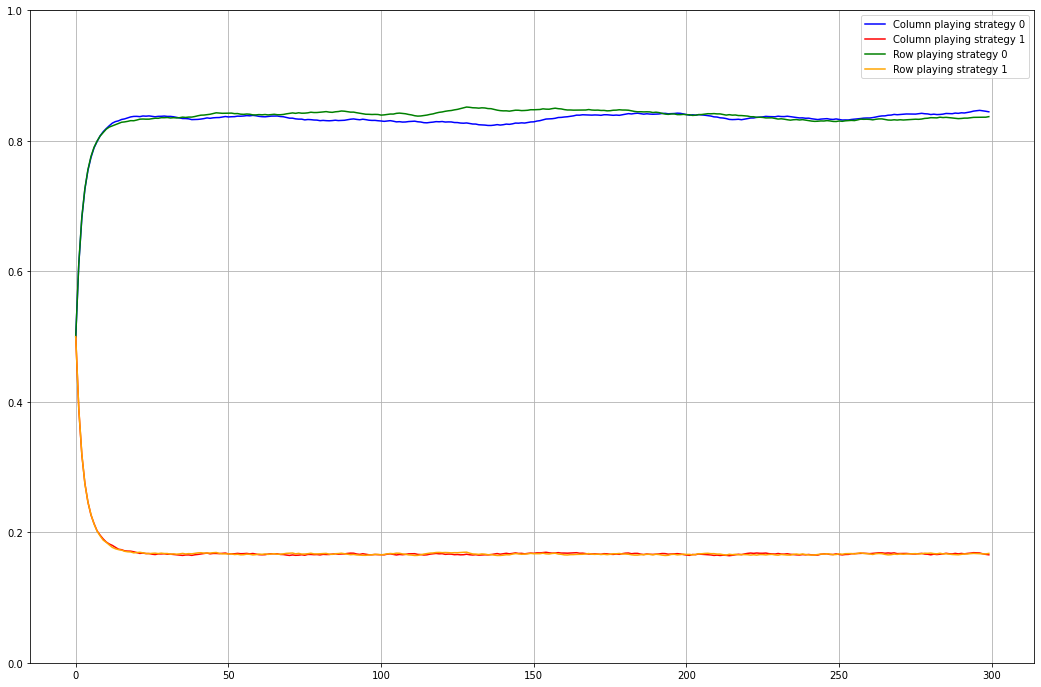

In [12]:
popStateRow_lists, popStateCol_lists = replicator_simulation(replicatorsystem_row, replicatorsystem_col, 300, [0.5, 0.5], [0.5, 0.5])

plt.rcParams["figure.figsize"] = (18,12)

popStateRow_array = np.array(popStateRow_lists)
popStateCol_array = np.array(popStateCol_lists)

plt.plot(popStateCol_array[0, 1:], 'b', label ='Column playing strategy 0')
plt.plot(popStateCol_array[1, 1:], 'r', label ='Column playing strategy 1')

plt.plot(popStateRow_array[0, 1:], 'g', label ='Row playing strategy 0')
plt.plot(popStateRow_array[1, 1:], 'orange', label ='Row playing strategy 1')

plt.grid()
plt.ylim(0, 1)
plt.legend(loc='best')

### NOTE
# Note, that due to the effect of *relative* pay-off maximisation in small populations,
# the finite single populaton model with 10 contestants leads to increased aggression/hawkish 
# behavior as compared to the model above assuming a single but infinite population ("overdissipation"). 
# This replicates Schaffer (1988).

### Attacker-Defender Contest

In [13]:
# Create the pay-off matrix and calculate Nash equilibrium for the 2-strategy AD-Contest 
# as reported in De Dreu & Gross (2018) review paper.

E_A = 1
E_D = 2
c = 1
                           # CP                    # CN
AD_Game = [[                 [ E_A,  E_D ], [ E_A    , E_D - c] ], # CP
           [ [E_A - c + E_D , E_D - E_D  ], [ E_A - c, E_D - c] ]] # CN

print(gt.NormalFormGame(AD_Game))
print(gt.vertex_enumeration(gt.NormalFormGame(AD_Game)))

2-player NormalFormGame with payoff profile array:
[[[1, 2],  [1, 1]],
 [[2, 0],  [0, 1]]]
[(array([0.5, 0.5]), array([0.5, 0.5]))]


#### Classical evolutionary model - two populations

In [14]:
# Building the replicator system for the AD-Contest assuming separate attacker and defender populations.
replicatorsystem_row, replicatorsystem_col = game_to_two_populations_replicator_system(AD_Game)

print(replicatorsystem_row, replicatorsystem_col)

The average pay-off of Row playing strategy 0 is q0 + q1
The average pay-off of Row playing strategy 1 is 2*q0
The average pay-off of Row for the current strategy mix is p0*(q0 + q1) + 2*p1*q0
The replicator system for Row strategy 0 is p0*(-p0*(q0 + q1) - 2*p1*q0 + q0 + q1)
The replicator system for Row strategy 1 is p1*(-p0*(q0 + q1) - 2*p1*q0 + 2*q0)
The simplified replicator system for Row strategy 0 is p1*(1 - 2*q1)*(p1 - 1)
The simplified replicator system for Row strategy 1 is p1*(2*p1*q1 - p1 - 2*q1 + 1)
The average pay-off of Column playing strategy 0 is 2*p0
The average pay-off of Column playing strategy 1 is p0 + p1
The average pay-off of Column for the current strategy mix is 2*p0*q0 + q1*(p0 + p1)
The replicator system for Column strategy 0 is q0*(-2*p0*q0 + 2*p0 - q1*(p0 + p1))
The replicator system for Column strategy 1 is q1*(-2*p0*q0 + p0 + p1 - q1*(p0 + p1))
The simplified replicator system for Column strategy 0 is q1*(2*p1*q1 - 2*p1 - q1 + 1)
The simplified replicato

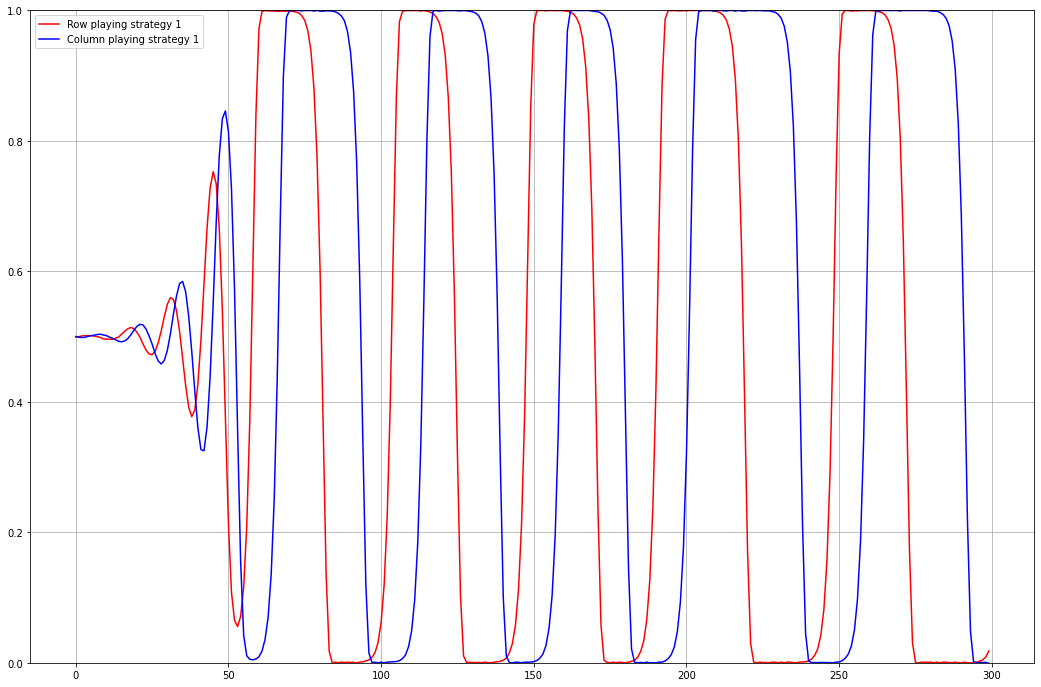

In [15]:
# Simulate and plot the population development for 300 iterations.
popStateRow_lists, popStateCol_lists = replicator_simulation(replicatorsystem_row, replicatorsystem_col, 300, [0.5, 0.5], [0.5, 0.5])

plt.rcParams["figure.figsize"] = (18,12)

popStateRow_array = np.array(popStateRow_lists)
popStateCol_array = np.array(popStateCol_lists)

plt.plot(popStateRow_array[1, 1:], 'r', label ='Row playing strategy 1')
plt.plot(popStateCol_array[1, 1:], 'b', label ='Column playing strategy 1')

plt.grid()
plt.ylim(0, 1)
plt.legend(loc='best')

#### Classical evolutionary model - one population

In [16]:
# Building the replicator system for the AD-Contest assuming players come from the same population.
replicatorsystem_row, replicatorsystem_col = game_to_one_population_replicator_system(AD_Game)

print(replicatorsystem_row, replicatorsystem_col)

The average pay-off of Row playing strategy 0 is p0 + p1
The average pay-off of Row playing strategy 1 is 2*p0
The average pay-off of Row for the current strategy mix is 2*p0*p1 + p0*(p0 + p1)
The replicator system for Row strategy 0 is p0*(-2*p0*p1 - p0*(p0 + p1) + p0 + p1)
The replicator system for Row strategy 1 is p1*(-2*p0*p1 - p0*(p0 + p1) + 2*p0)
p0 1 - p1
The simplified replicator system for Row strategy 0 is p1*(1 - 2*p1)*(p1 - 1)
p0 1 - p1
The simplified replicator system for Row strategy 1 is p1*(2*p1**2 - 3*p1 + 1)
[p1*(1 - 2*p1)*(p1 - 1), p1*(2*p1**2 - 3*p1 + 1)] [p1*(1 - 2*p1)*(p1 - 1), p1*(2*p1**2 - 3*p1 + 1)]


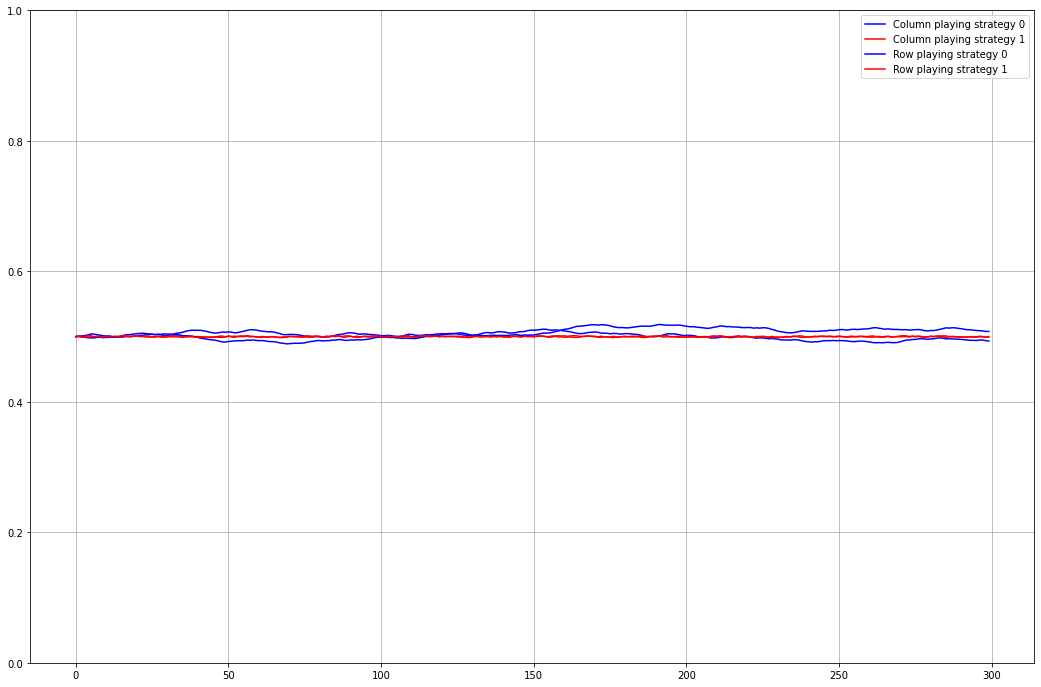

In [17]:
# Simulate and plot the population development for 300 iterations.
popStateRow_lists, popStateCol_lists = replicator_simulation(replicatorsystem_row, replicatorsystem_col, 300, [0.5, 0.5], [0.5, 0.5])

plt.rcParams["figure.figsize"] = (18,12)

popStateRow_array = np.array(popStateRow_lists)
popStateCol_array = np.array(popStateCol_lists)

plt.plot(popStateCol_array[0, 1:], 'b', label ='Column playing strategy 0')
plt.plot(popStateCol_array[1, 1:], 'r', label ='Column playing strategy 1')

plt.plot(popStateRow_array[0, 1:], 'b', label ='Row playing strategy 0')
plt.plot(popStateRow_array[1, 1:], 'r', label ='Row playing strategy 1')

plt.grid()
plt.ylim(0, 1)
plt.legend(loc='best')

### Rock-Paper-Scissors

In [46]:
# Create the pay-off matrix and calculate the Nash equilibrium for the well known "Rock-Paper-Scissors"-game

                           # Rock                       #  Paper                       # Scissors
RPS_Game = ([[  [ 0            , 0        ], [ -1           , 1        ], [ 1            , -1       ] ],  # Rock 
             [  [ 1            , -1       ], [ 0            , 0        ], [ -1           , 1        ] ],  # Paper 
             [  [ -1           , 1        ], [ 1            , -1       ], [ 0            , 0        ] ]]) # Scissors

print(gt.NormalFormGame(RPS_Game ))
print(gt.vertex_enumeration(gt.NormalFormGame(RPS_Game )))

2-player NormalFormGame with payoff profile array:
[[[ 0,  0],  [-1,  1],  [ 1, -1]],
 [[ 1, -1],  [ 0,  0],  [-1,  1]],
 [[-1,  1],  [ 1, -1],  [ 0,  0]]]
[(array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333]))]


In [57]:
# Building the replicator system for the "Rock-Paper-Scissors"-game assuming one population.

replicatorsystem_row, replicatorsystem_col = game_to_one_population_replicator_system(RPS_Game)

print(replicatorsystem_row, replicatorsystem_col)

The average pay-off of Row playing strategy 0 is -p1 + p2
The average pay-off of Row playing strategy 1 is p0 - p2
The average pay-off of Row playing strategy 2 is -p0 + p1
The average pay-off of Row for the current strategy mix is p0*(-p1 + p2) + p1*(p0 - p2) + p2*(-p0 + p1)
The replicator system for Row strategy 0 is p0*(-p0*(-p1 + p2) - p1*(p0 - p2) - p1 - p2*(-p0 + p1) + p2)
The replicator system for Row strategy 1 is p1*(-p0*(-p1 + p2) + p0 - p1*(p0 - p2) - p2*(-p0 + p1) - p2)
The replicator system for Row strategy 2 is p2*(-p0*(-p1 + p2) - p0 - p1*(p0 - p2) + p1 - p2*(-p0 + p1))
p0 -p1 - p2 + 1
The simplified replicator system for Row strategy 0 is p1**2 - p1 - p2**2 + p2
p0 -p1 - p2 + 1
The simplified replicator system for Row strategy 1 is p1*(-p1 - 2*p2 + 1)
p0 -p1 - p2 + 1
The simplified replicator system for Row strategy 2 is p2*(2*p1 + p2 - 1)
[p1**2 - p1 - p2**2 + p2, p1*(-p1 - 2*p2 + 1), p2*(2*p1 + p2 - 1)] [p1**2 - p1 - p2**2 + p2, p1*(-p1 - 2*p2 + 1), p2*(2*p1 + p2 - 1)

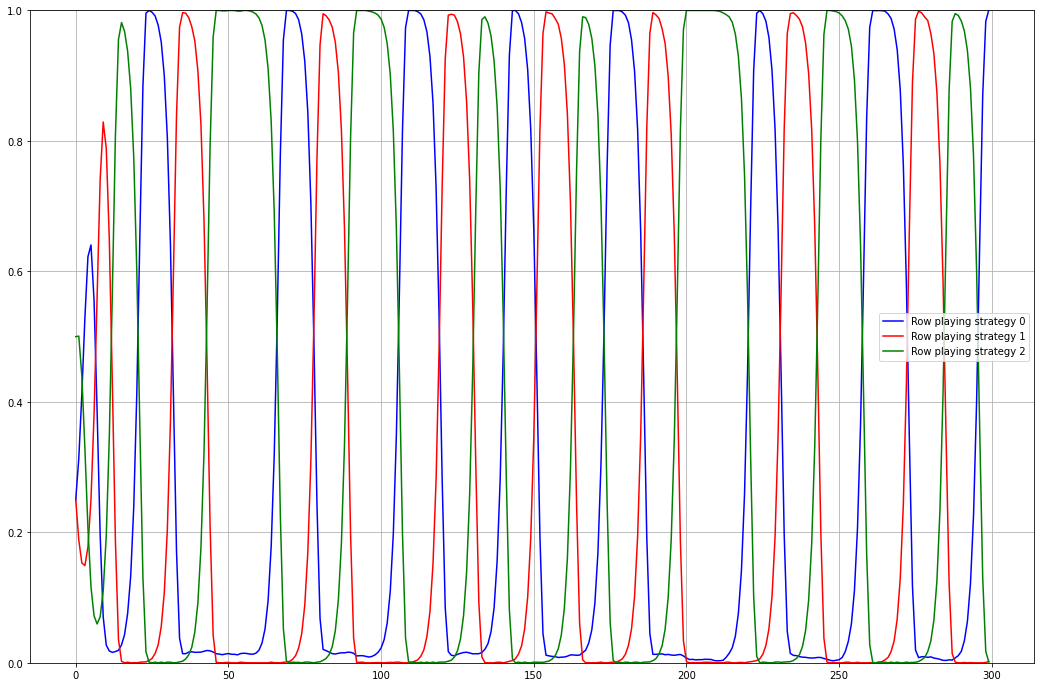

In [59]:
# Simulate and plot the population development for 300 iterations.
popStateRow_lists, popStateCol_lists = replicator_simulation(replicatorsystem_row, replicatorsystem_col, 300, [0.25,0.25,0.5], [0.25,0.25,0.5])

plt.rcParams["figure.figsize"] = (18,12)

popStateRow_array = np.array(popStateRow_lists)
popStateCol_array = np.array(popStateCol_lists)

plt.plot(popStateRow_array[0, 1:], 'b', label ='Row playing strategy 0')
plt.plot(popStateRow_array[1, 1:], 'r', label ='Row playing strategy 1')
plt.plot(popStateRow_array[2, 1:], 'g', label ='Row playing strategy 2')

plt.grid()
plt.ylim(0, 1)
plt.legend(loc='best')

### Battle of the sexes

In [63]:
# Create the pay-off matrix and calculate the Nash equilibrium for the "Battle of the Sexes"-game.
# https://en.wikipedia.org/wiki/Battle_of_the_sexes_(game_theory)

BattleOfTheSexes = [[[ 2, 1], [ 0, 0]],
                    [[ 0, 0], [ 1, 2]]]

print(gt.NormalFormGame(BattleOfTheSexes))
print(gt.vertex_enumeration(gt.NormalFormGame(BattleOfTheSexes)))

2-player NormalFormGame with payoff profile array:
[[[2, 1],  [0, 0]],
 [[0, 0],  [1, 2]]]
[(array([1., 0.]), array([1., 0.])), (array([0., 1.]), array([0., 1.])), (array([0.66666667, 0.33333333]), array([0.33333333, 0.66666667]))]


In [65]:
# Building the replicator system for the "Battle of the Sexes"-game assuming two populations.
replicatorsystem_row, replicatorsystem_col = game_to_two_populations_replicator_system(BattleOfTheSexes)

print(replicatorsystem_row, replicatorsystem_col)

The average pay-off of Row playing strategy 0 is 2*q0
The average pay-off of Row playing strategy 1 is q1
The average pay-off of Row for the current strategy mix is 2*p0*q0 + p1*q1
The replicator system for Row strategy 0 is p0*(-2*p0*q0 - p1*q1 + 2*q0)
The replicator system for Row strategy 1 is p1*(-2*p0*q0 - p1*q1 + q1)
The simplified replicator system for Row strategy 0 is p1*(3*p1*q1 - 2*p1 - 3*q1 + 2)
The simplified replicator system for Row strategy 1 is p1*(-3*p1*q1 + 2*p1 + 3*q1 - 2)
The average pay-off of Column playing strategy 0 is p0
The average pay-off of Column playing strategy 1 is 2*p1
The average pay-off of Column for the current strategy mix is p0*q0 + 2*p1*q1
The replicator system for Column strategy 0 is q0*(-p0*q0 + p0 - 2*p1*q1)
The replicator system for Column strategy 1 is q1*(-p0*q0 - 2*p1*q1 + 2*p1)
The simplified replicator system for Column strategy 0 is q1*(3*p1*q1 - 3*p1 - q1 + 1)
The simplified replicator system for Column strategy 1 is q1*(-3*p1*q1 + 3*

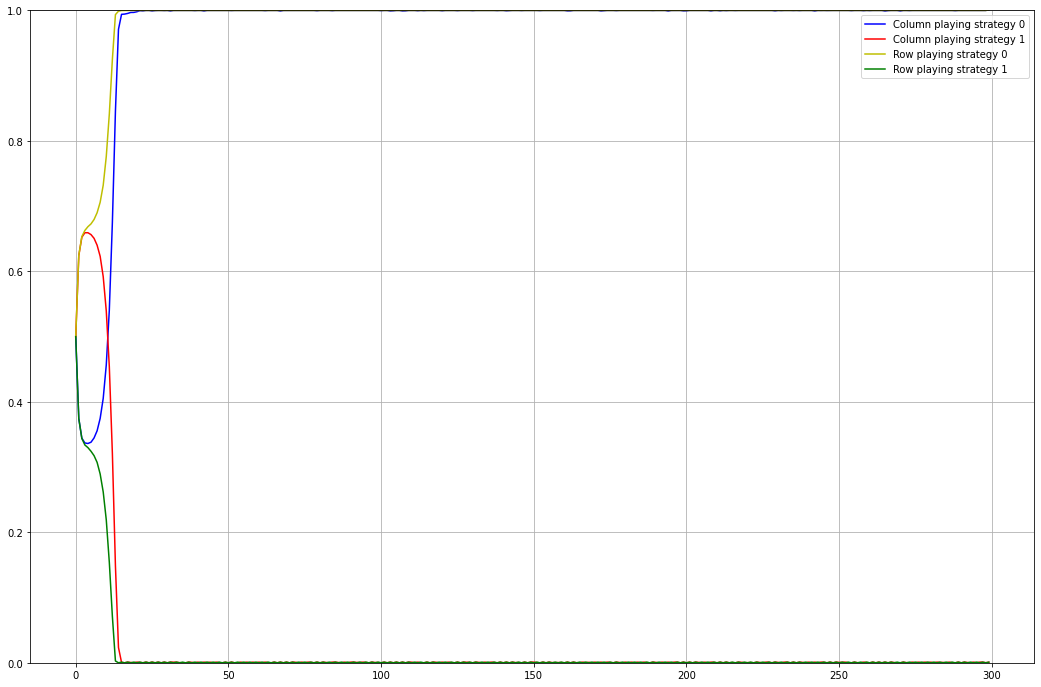

In [74]:
# Simulate and plot the population development for 300 iterations.
popStateRow_lists, popStateCol_lists = replicator_simulation(replicatorsystem_row, replicatorsystem_col, 300, [0.5, 0.5], [0.5, 0.5])

plt.rcParams["figure.figsize"] = (18,12)

popStateRow_array = np.array(popStateRow_lists)
popStateCol_array = np.array(popStateCol_lists)

plt.plot(popStateCol_array[0, 1:], 'b', label ='Column playing strategy 0')
plt.plot(popStateCol_array[1, 1:], 'r', label ='Column playing strategy 1')

plt.plot(popStateRow_array[0, 1:], 'y', label ='Row playing strategy 0')
plt.plot(popStateRow_array[1, 1:], 'g', label ='Row playing strategy 1')

plt.grid()
plt.ylim(0, 1)
plt.legend(loc='best')

### Libraries and Functions **LOAD THIS FIRST**

In [3]:
# Install QuantEcon
!pip install QuantEcon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 206 kB 8.8 MB/s 


In [4]:
# Used libraries
import matplotlib.pyplot as plt
%matplotlib inline
# Numpy
import numpy as np
# Quantecon
import quantecon.game_theory as gt
# Sympy
from sympy import *
# Randomizer
import random

In [5]:
# Functions

# This function takes a two-player game matrix (as list or array) and converts it into a 
# system of replicator equations, assuming a single population that plays against itself.
def game_to_one_population_replicator_system(game):

  # If a list was given we convert to numpy array
  if type(game) == list:
    game = np.array(game)

  # Get the dimensions of the game
  shapeofgame = game.shape  

  replicatorsystem = []
  replicatorsystem_row = []
  replicatorsystem_col = []

  # We create the equations defining the probabilities 
  p_sum = 1
  p_list = []
  for i in range(0,shapeofgame[0]):
    p = Symbol("p{}".format(i))
    p_list.append(p)
    if i != 0:
      p_sum -= p

  # We put together the equation describing the average pay-off of the population state for row dependent on the the population state of column.
  populationmix = 0
  expPObyStrategy = []
  for i in range(0,shapeofgame[0]):
    colmixbyrow = 0
    for o in range(0,shapeofgame[1]): 
      colmixbyrow += p_list[o] * game[i, o, 0]  # Create an equation describing the average pay-off against the population mix of column for each row strategy.
    print("The average pay-off of Row playing strategy", i,"is", colmixbyrow)
    expPObyStrategy.append(colmixbyrow)
    populationmix += p_list[i] * colmixbyrow # Put together the equation for the average pay-off of the row population.
  print("The average pay-off of Row for the current strategy mix is", populationmix)

  # We create the replictor system
  for i in range(0,shapeofgame[0]):
    replicatorequation = (expPObyStrategy[i] - populationmix) * p_list[i]
    print("The replicator system for Row strategy", i,"is", replicatorequation)
    replicatorsystem.append(replicatorequation)  

  # We factorize the equation
  for i in range(0,shapeofgame[0]):
    print(p_list[0], p_sum)
    replicatorsystem[i] = replicatorsystem[i].subs(p_list[0], p_sum)
    replicatorsystem[i] = simplify(replicatorsystem[i])
    print("The simplified replicator system for Row strategy", i,"is", replicatorsystem[i])

  replicatorsystem_row = replicatorsystem
  replicatorsystem_col = replicatorsystem

  return replicatorsystem_row, replicatorsystem_col


# This function takes a two-player game matrix (as list or array) and converts it into a 
# system of replicator equations, assuming two separate populations that play against each other.
def game_to_two_populations_replicator_system(game):

  # If a list was given we convert to numpy
  if type(game) == list:
    game = np.array(game)

  # Get the dimensions of the game
  shapeofgame = game.shape  

  replicatorsystem_row = []
  replicatorsystem_col = []

  # We create the equations defining the probabilities 
  p_sum = 1
  p_list = []
  for i in range(0,shapeofgame[0]):
    p = Symbol("p{}".format(i))
    p_list.append(p)
    if i != 0:
      p_sum -= p

  q_sum = 1
  q_list = []
  for o in range(0,shapeofgame[1]):
    q = Symbol("q{}".format(o))
    q_list.append(q)
    if o != 0:
      q_sum -= q

  # We put together the equation describing the average pay-off of the population state for row dependent on the the population state of column.
  populationmix_row = 0
  expPObyStrategy_row = []
  for i in range(0,shapeofgame[0]):
    colmixbyrow = 0
    for o in range(0,shapeofgame[1]): 
      colmixbyrow += q_list[o] * game[i, o, 0]  # Create an equation describing the average pay-off against the population mix of column for each row strategy.
    print("The average pay-off of Row playing strategy", i,"is", colmixbyrow)
    expPObyStrategy_row.append(colmixbyrow)
    populationmix_row += p_list[i] * colmixbyrow # Put together the equation for the average pay-off of the row population.
  print("The average pay-off of Row for the current strategy mix is", populationmix_row)

  # We create the replictor system
  for i in range(0,shapeofgame[0]):
    replicatorequation = (expPObyStrategy_row[i] - populationmix_row) * p_list[i]
    print("The replicator system for Row strategy", i,"is", replicatorequation)
    replicatorsystem_row.append(replicatorequation)  

  # We factorize the equation
  for i in range(0,shapeofgame[0]):
    replicatorsystem_row[i] = replicatorsystem_row[i].subs(p_list[0], p_sum)
    replicatorsystem_row[i] = replicatorsystem_row[i].subs(q_list[0], q_sum)
    replicatorsystem_row[i] = simplify(replicatorsystem_row[i])
    print("The simplified replicator system for Row strategy", i,"is", replicatorsystem_row[i])

  # We put together the equation describing the average pay-off of the population state for column dependent on the the population state of row.
  populationmix_col = 0
  expPObyStrategy_col = []
  for i in range(0,shapeofgame[1]):
    rowmixbycol = 0
    for o in range(0,shapeofgame[0]): 
      rowmixbycol += p_list[o] * game[o, i, 1]  # Create an equation describing the average pay-off against the population mix of column for each row strategy.
    print("The average pay-off of Column playing strategy", i,"is", rowmixbycol)
    expPObyStrategy_col.append(rowmixbycol)
    populationmix_col += q_list[i] * rowmixbycol # Put together the equation for the average pay-off of the column population.
  print("The average pay-off of Column for the current strategy mix is", populationmix_col)

  # We create the replictor system
  for i in range(0,shapeofgame[1]):
    replicatorequation = (expPObyStrategy_col[i] - populationmix_col) * q_list[i]
    print("The replicator system for Column strategy", i,"is", replicatorequation)
    replicatorsystem_col.append(replicatorequation)  

  # We factorize the equation
  for i in range(0,shapeofgame[1]):
    replicatorsystem_col[i] = replicatorsystem_col[i].subs(p_list[0], p_sum)
    replicatorsystem_col[i] = replicatorsystem_col[i].subs(q_list[0], q_sum)
    replicatorsystem_col[i] = simplify(replicatorsystem_col[i])
    print("The simplified replicator system for Column strategy", i,"is", replicatorsystem_col[i])

  return replicatorsystem_row, replicatorsystem_col


# This function takes a two-player game matrix (as list or array) and converts it into a 
# system of replicator equations, applying Schaffer's (1988) analysis of evolutionary stable states.
# Schaffer (1988) generalises Smith and Price (1973) ESS solution concept to take both finite population 
# and variable contest size into account. The function therefore takes the population of contestants *contestants_N*
# and the contest size *contestsize_n* as arguments. In contrast to classical evolutionar analysis,
# the replicator systems take the probability of players facing mutants in small populations into account. 
def game_to_finite_population_replicator_system(game, contestants_N, contestsize_n):
  # If a list was given we convert to numpy
  if type(game) == list:
    game = np.array(game)

  # Get the dimensions of the game
  shapeofgame = game.shape  

  replicatorsystem = []

  replicatorsystem_row = []
  replicatorsystem_col = []

  # We create the equations defining the probabilities 
  p_sum = 1
  p_list = []
  for i in range(0,shapeofgame[0]):
    p = Symbol("p{}".format(i))
    p_list.append(p)
    if i != 0:
      p_sum -= p

  # The probability for a members of the general population of playing against a mutant if with a population of size N and a contest of size n
  p_mutant = ((contestsize_n - 1) / (contestants_N - 1))
  p_pop = 1 - p_mutant

  # We put together the equation describing the average pay-off of the population state for row dependent on the the population state of column.
  expPOpopulationmix = 0
  expPOpopilationmixandmutant = 0
  expPObyStrategy = []
  facingthemutantbystrat = []
  for i in range(0,shapeofgame[0]):
    colmixbyrow = 0
    for o in range(0,shapeofgame[1]): 
      colmixbyrow += p_list[o] * game[i, o, 0] # Create an equation describing the average pay-off against the population mix of column for each row strategy.
    print("The average pay-off of Row playing strategy", i,"is", colmixbyrow)
    facingthemutant = 0
    for l in range(0,shapeofgame[0]): 
      facingthemutant += p_list[l] * game[l, i, 0] # Create an equation describing the average pay-off against the population mix of column for each row strategy.
    facingthemutantbystrat.append(facingthemutant)
    print("The average pay-off of a random population member facing the mutant with strategy", i,"is", facingthemutant)
    expPObyStrategy.append(colmixbyrow)
    expPOpopulationmix += p_list[i] * colmixbyrow # Put together the equation for the average pay-off of the row population.
  print("The exp. average pay-off of Row for the current strategy mix is", expPOpopulationmix)

  # We create the replictor system
  for i in range(0,shapeofgame[0]):
    print(i, p_pop, expPOpopulationmix,  p_pop * expPOpopulationmix)
    print(i, p_mutant, facingthemutantbystrat[i], p_mutant * facingthemutantbystrat[i])
    expPOpopilationmixandmutant = p_pop * expPOpopulationmix + p_mutant * facingthemutantbystrat[i]
    #print("The exp. avg. PO of an avg. player when facing the population and possible mutant(s) with strategy", i, "is", expPOpopilationmixandmutant)
    replicatorequation = (expPObyStrategy[i] - expPOpopilationmixandmutant) * p_list[i]
    print("The replicator system for Row strategy", i,"is", replicatorequation)
    replicatorsystem.append(replicatorequation)  

  # We factorize the equation
  for i in range(0,shapeofgame[0]):
    replicatorsystem[i] = replicatorsystem[i].subs(p_list[0], p_sum)
    replicatorsystem[i] = simplify(replicatorsystem[i])
    print("The simplified replicator system for Row strategy", i,"is", replicatorsystem[i])

  replicatorsystem_row = replicatorsystem
  replicatorsystem_col = replicatorsystem

  return replicatorsystem_row, replicatorsystem_col


# This function takes the replicator systems of the row and column player *rowReplEq* and *colReplEq* and the 
# intitial population states *initPopStateRow* and *initPopStateCol*, then calculates all population states over 
# a number of *rounds*. Returns two lists with the calculated population states: *popStateRow_lists* and *popStateCol_lists*
def replicator_simulation(rowReplEq, colReplEq, rounds, initPopStateRow, initPopStateCol):

  # If the replicator system of row and column is the same, we create two identical initial list of lists with p0 ... pi identifying the strategy and the intial populaton values. 
  if rowReplEq == colReplEq:

    popStateRow_lists = []
    for i in range(0, len(rowReplEq)):
      popStateRow_lists.append([])
      popStateRow_lists[i].append(Symbol("p{}".format(i))) # Append p0 ... pi
      popStateRow_lists[i].append(initPopStateRow[i]) # Append initial population state for row

    popStateCol_lists = []
    for i in range(0, len(rowReplEq)):
      popStateCol_lists.append([])
      popStateCol_lists[i].append(Symbol("p{}".format(i))) # Append p0 ... pi
      popStateCol_lists[i].append(initPopStateCol[i]) # Append initial population state for col

  # If the replicator system of row and column is different (an asymmetrical game), we create two seperate initial list of lists with p0 ... pi identifying the strategy and the intial populaton values for row and q0 ... qi identifying the strategy and the intial population values for col
  else:
    popStateRow_lists = []
    for i in range(0, len(rowReplEq)):
      popStateRow_lists.append([])
      popStateRow_lists[i].append(Symbol("p{}".format(i))) # Append p0 ... pi
      popStateRow_lists[i].append(initPopStateRow[i]) # Append initial population state for row

    popStateCol_lists = []
    for i in range(0, len(colReplEq)):
      popStateCol_lists.append([])
      popStateCol_lists[i].append(Symbol("q{}".format(i))) # Append q0 ... qi
      popStateCol_lists[i].append(initPopStateCol[i]) # Append initial population state for col

  # create backup of replicator systems
  rowReplEqbu = rowReplEq.copy()
  colReplEqbu = colReplEq.copy()
  # Random mutation added each round
  randomMutation = 0.001

  # For each round...
  for t in range(1, rounds):
  
      rowReplEq = rowReplEqbu.copy() 
      colReplEq = colReplEqbu.copy()

      # Random effect depending on edge cases for row
      for i in range(0, len(rowReplEq)): # For each replicator equation of row...
        if popStateRow_lists[i][t] >= 1:
            popStateRow_lists[i][t] = 1
            randRow = random.uniform(-randomMutation, randomMutation)
        elif popStateRow_lists[i][t] <= 0:
            popStateRow_lists[i][t] = 0
            randRow = random.uniform(randomMutation, randomMutation)
        else:
            randRow = random.uniform(-randomMutation, randomMutation) 

      for i in range(0, len(colReplEq)): # For each replicator equation of row...
        
        # Random effect depending on edge cases for col
        if popStateCol_lists[i][t] >= 1:
            popStateCol_lists[i][t] = 1
            randCol = random.uniform(-randomMutation, randomMutation)
        elif popStateCol_lists[i][t] <= 0:
            popStateCol_lists[i][t] = 0
            randCol = random.uniform(randomMutation, randomMutation)
        else:
            randCol = random.uniform(-randomMutation, randomMutation) 

        for o in list(rowReplEq[i].free_symbols): # For each symbol in the equation...
          for c, j in enumerate(popStateRow_lists): # Loop through symbols of equation i and..
            if o == j[0]: # If the symbol matches the first entry of popStateRow_lists
              rowReplEq[i] = rowReplEq[i].subs(o, j[t]) # Replace the symbol in equation i with the population state j
          for c, j in enumerate(popStateCol_lists):
            if o == j[0]: # If the symbol matches the first entry of popStateCol_lists
              rowReplEq[i] = rowReplEq[i].subs(o, j[t])   # Replace the symbol in equation i with the population state j
        popStateRow_new = popStateRow_lists[i][t] + (rowReplEq[i]) + randRow
        popStateRow_lists[i].append(popStateRow_new)

      for i in range(0, len(colReplEq)): # For each replicator equation of column...
        if popStateCol_lists[i][t] >= 1:
            popStateCol_lists[i][t] = 1
            randCol = random.uniform(-randomMutation, randomMutation)
        elif popStateCol_lists[i][t] <= 0:
            popStateCol_lists[i][t] = 0
            randCol = random.uniform(randomMutation, randomMutation)

        for o in list(colReplEq[i].free_symbols): # For each symbol in the equation...
          for c, j in enumerate(popStateCol_lists):
            if o == j[0]:
              colReplEq[i] = colReplEq[i].subs(o, j[t]) 
          for c, j in enumerate(popStateRow_lists):
            if o == j[0]:
              colReplEq[i] = colReplEq[i].subs(o, j[t]) 

        popStateCol_new = popStateCol_lists[i][t] + (colReplEq[i]) + randCol
        popStateCol_lists[i].append(popStateCol_new)

  return popStateRow_lists, popStateCol_lists